## Градиетный спуск

Занимаясь наукой о данных, мы часто пытаемся отыскать оптимальную модель для конкретной ситуации. Под оптимальной подразумевается модель, которая минимизирует ошибку предсказаний. Другими словами, мы решаем оптимизационную задачу.

Основной метод, позволяющий решать оптимизационные задачи - это метод градиентного спуска. Главная  идея этого метода заключается в том, чтобы каким-либо образом задать начальные веса модели, а затем двигаться в сторону антиградиента ошибки, т к мы хотим найти минимум ошибки. При этом метод градиентного спуска не застраховывает от случаев нахождения локального минимума вместо глобального.

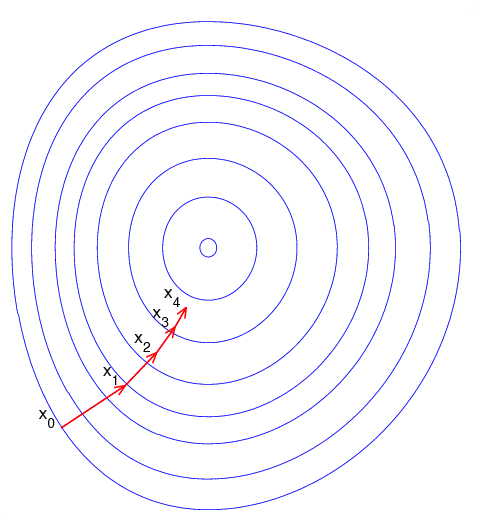

Давайте рассмотрим простую задачу. Пусть имеется некая функция от одного переменного f(x) = 2*x^2 + 1. Определим эту функцию:

In [ ]:
def f(x):
  return x ** 2 - x

Предположим, что мы хотим найти минимум этой функции методом градиентного спуска.

Нам необходимо вычислить производную, т к антиградиент в случае функции одной переменной означает производную по этой переменной, взятую с противоположным знаком. Производную можно определить как разностное отношение в случае очень малениких h:

In [ ]:
def diff(f, x, h):
  return (f(x + h) - f(x)) / h

Теперь определим шаг градиентного спуска:

In [ ]:
def grad_step(f, x, h, alpha):
  return - alpha * diff(f, x, h)

Осталось только имплементировать весь алгоритм:

In [ ]:
import random
def GD(f, h, epochs, alpha):
  # задаем случайные значения параметров модели. В нашем случае параметром служит x
  x = random.random()
  # столько раз, чтобы точно прийти в минимум
  for epoch in range(epochs):
    # считаем антиградиент
    x = x + grad_step(f, x, h, alpha)
    if epoch % 50 == 0:
      print(f'Epoch {epoch}: x = {x}')
  # возвращаем значение x в минимуме
  return x

Теперь попробуем этот метод применить к нашей функции:

In [ ]:
x = GD(f, 0.0001, 1000, 0.01)

Epoch 0: x = 0.2973649875130481
Epoch 50: x = 0.4261746808121709
Epoch 100: x = 0.47308326561303804
Epoch 150: x = 0.4901659499333151
Epoch 200: x = 0.49638694561725716
Epoch 250: x = 0.49865244362530436
Epoch 300: x = 0.49947746931013515
Epoch 350: x = 0.499777918649837
Epoch 400: x = 0.4998873331897653
Epoch 450: x = 0.4999271786477595
Epoch 500: x = 0.49994168915544657
Epoch 550: x = 0.49994697344239347
Epoch 600: x = 0.4999488978194734
Epoch 650: x = 0.4999495986192777
Epoch 700: x = 0.49994985382930857
Epoch 750: x = 0.49994994676907
Epoch 800: x = 0.4999499806148989
Epoch 850: x = 0.49994999294053666
Epoch 900: x = 0.49994999742915447
Epoch 950: x = 0.499949999063783


Как мы видим, значение близится к аналитическому x0 = 0.5.

Теперь вернемся к проблеме поиска оптимальной модели. В этом случае оптимизируется ФУНКЦИЯ ОШИБКИ. Поскольку часто в качестве ошибки выбирается MSE, будем оптимизировать эту функцию. .

Рассмотрим линейную регрессию в одномерном случае:

In [ ]:
def y_func(x, w, w0):
  return w * x + w0

In [ ]:
def loss(y_true, y_pred):
  return np.average((y_true - y_pred) ** 2, axis=0)[0]

Как легко заметить, это обычное уравнение прямой на плоскости. Теперь будем оптимизировать ошибку методом градиентного спуска. Заметим, что в случае подачи на вход модели вектора появляется сумма по всем членам, номированная на длину вектора:

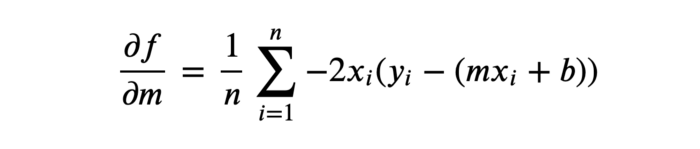

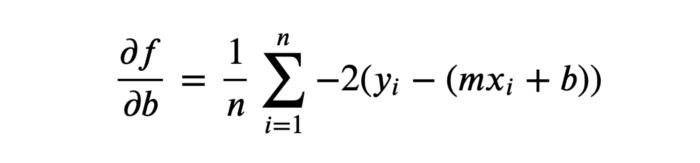

In [ ]:
import numpy as np

def linear_regression_1d(x, y, x_test, epochs, alpha):
  # задаем начальные веса
  assert len(x) == len(y)
  w = np.random.random()
  w0 = np.random.random()
 
  for epoch in range(epochs):
    f = y - (w * x + w0)
    w0 = w -  alpha / len(y) * (-2 * f.sum())
    w = w - alpha / len(y) * (-2 * x.T.dot(f).sum())
    loss_ = loss(y, y_func(x, w, w0))
    print(f'Epoch {epoch}: loss: {loss_}')

  return y_func(x_test, w, w0)

In [ ]:
x = np.array([1, 3, 4, 6, 8, 9, 15, 12, 16]).reshape(-1, 1)
y = np.array([0, 0.5, 3, 4, 6, 8, 10, 11, 13]).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_train, x_test = MinMaxScaler().fit(x).transform(X_train.reshape(-1, 1)), MinMaxScaler().fit(x).transform(X_test.reshape(-1, 1))

In [ ]:
y_pred = linear_regression_1d(x_train, y_train, x_test, 1000, 0.05)

Epoch 0: loss: 50.71676642296264
Epoch 1: loss: 41.608556544419294
Epoch 2: loss: 34.35102957997665
Epoch 3: loss: 28.587969745912247
Epoch 4: loss: 24.021495759423047
Epoch 5: loss: 20.41248915622562
Epoch 6: loss: 17.568726730035525
Epoch 7: loss: 15.33578333197235
Epoch 8: loss: 13.589675936220056
Epoch 9: loss: 12.230932188561136
Epoch 10: loss: 11.179807748361943
Epoch 11: loss: 10.372430640381024
Epoch 12: loss: 9.757693556308071
Epoch 13: loss: 9.294749571447932
Epoch 14: loss: 8.950994615776597
Epoch 15: loss: 8.700442542587263
Epoch 16: loss: 8.522416805986047
Epoch 17: loss: 8.400497425503271
Epoch 18: loss: 8.321673756253206
Epoch 19: loss: 8.275663140817121
Epoch 20: loss: 8.25436323394829
Epoch 21: loss: 8.251412018279611
Epoch 22: loss: 8.26183455508524
Epoch 23: loss: 8.281759570250607
Epoch 24: loss: 8.308192248817255
Epoch 25: loss: 8.338832252680277
Epoch 26: loss: 8.371928107057363
Epoch 27: loss: 8.406160820584988
Epoch 28: loss: 8.440550990746468
Epoch 29: loss: 8.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

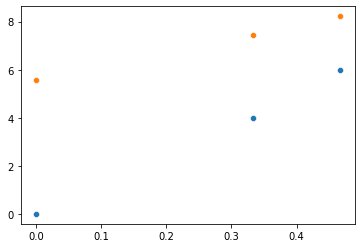

In [ ]:
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=y_test.reshape(1, -1)[0])
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=y_pred.reshape(1, -1)[0])

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

lr = SGDRegressor()
lr.fit(x_train.reshape(-1, 1), y_train)
y_pred = lr.predict(x_test.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


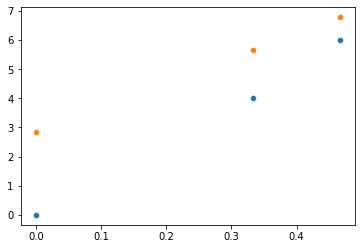

In [ ]:
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=y_test.reshape(1, -1)[0])
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=y_pred.reshape(1, -1)[0])

In [ ]:
mean_squared_error(y_test, y_pred)

3.798357228971406

Вероятно, наш градиентный спуск попал в локальный минимум и не смог оттуда выбраться. Тем не менее, it works!

Давайте обернем наш градиентный спуск в класс:

In [ ]:
class LinearRegressionGD:
  def y_func(self, x):
    return self.w * x + self.w0

  def loss(self, y_true, y_pred):
    return np.average((y_true - y_pred) ** 2, axis=0)[0]

  def fit(self, x, y, epochs=100, alpha=0.01):
    assert len(x) == len(y)
    self.w = np.random.random()
    self.w0 = np.random.random()
    for epoch in range(epochs):
      f = y - (self.w * x + self.w0)
      self.w0 = self.w -  alpha / len(y) * (-2 * f.sum())
      self.w = self.w - alpha / len(y) * (-2 * x.T.dot(f).sum())
      loss_ = self.loss(y, self.y_func(x))

  def predict(self, x):
    return self.y_func(x)

In [ ]:
lr = LinearRegressionGD()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

10.950679887486261

In [ ]:
lr.loss(y_test, y_pred)

10.950679887486261

И теперь, наконец, построим градиентный спуск для общего случая линейной регрессии, с N признаками на входе:

In [ ]:
class LinearRegressionGD:
    def y_func(self, x):
        y = x.dot(self.w) + self.w0
        return y.reshape(-1, 1)

    def loss(self, y_true, y_pred):
        return np.average((y_true - y_pred) ** 2, axis=0)[0]

    def fit(self, x, y, epochs=500, alpha=0.0001):
        assert len(x) == len(y)
        self.w = np.random.random(size=(x.shape[1],1))
    
        self.w0 = np.random.random()
        for epoch in range(epochs):

            f = (y - self.y_func(x))
            self.w0 = self.w0 -  alpha / len(y) * (-2 * f.sum())
            self.w = self.w - alpha / len(y) * (-2 * x.T.dot(f).sum())
            loss_ = self.loss(y, self.y_func(x))
            print(f'Epoch {epoch}: loss = {loss_}')

    def predict(self, x):
        return self.y_func(x)

В качестве тренировочного датасета загрузим датасет Graduate Admission 2

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf" -O data.csv

--2020-12-21 14:41:49--  https://docs.google.com/uc?export=download&id=1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf
Resolving docs.google.com (docs.google.com)... 108.177.127.139, 108.177.127.138, 108.177.127.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/32ahsgsku0o7j7c2pmik1d67douje6po/1608561675000/01540819630670776734/*/1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf?e=download [following]
--2020-12-21 14:41:49--  https://doc-08-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/32ahsgsku0o7j7c2pmik1d67douje6po/1608561675000/01540819630670776734/*/1bWp01DceEwx5nXZ1cnuaPod9AV1nEjaf?e=download
Resolving doc-08-0g-docs.googleusercontent.com (doc-08-0g-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-08-0g-docs.googleusercontent.com (doc-08-

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Будем предсказывать колоку Chance of Admit

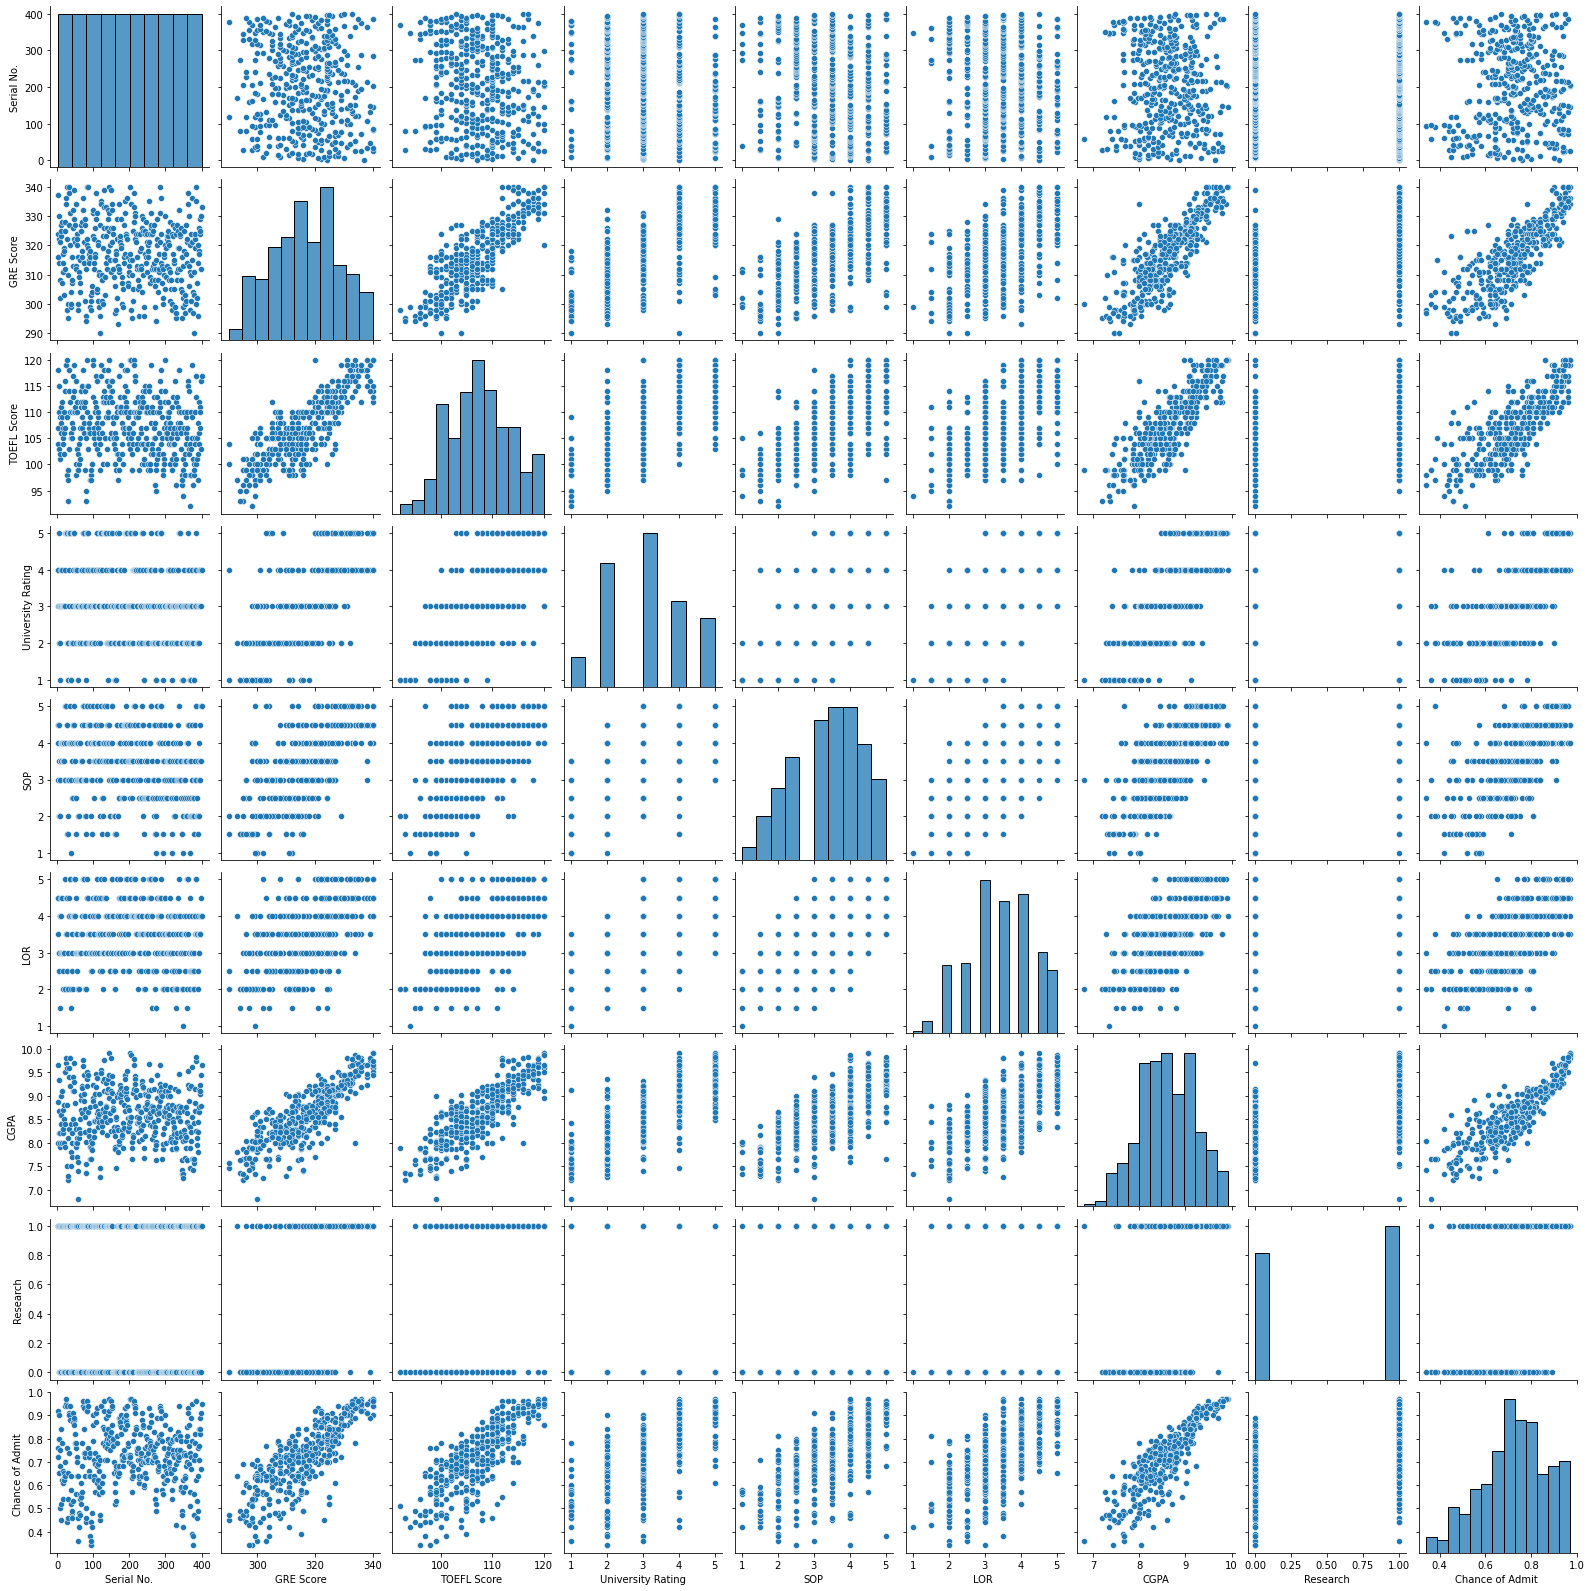

In [ ]:
sns.pairplot(data)

Видим, что практически все колонки коррелируют с предсказываемой.

In [ ]:
x = np.array(data.drop(columns=['Serial No.', 'Chance of Admit ']))
y = np.array(data['Chance of Admit '])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
x_train, x_test = MinMaxScaler().fit(x).transform(x_train), MinMaxScaler().fit(x).transform(x_test)

In [ ]:
import seaborn as sns
def plot_learning_curve(history):
  sns.lineplot(range(len(history)), history)

In [ ]:
lr = LinearRegressionGD()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

Epoch 0: loss = 0.010678407303523589
Epoch 1: loss = 0.016404662870355104
Epoch 2: loss = 0.01614196187619979
Epoch 3: loss = 0.016146905185473723
Epoch 4: loss = 0.01614382623239227
Epoch 5: loss = 0.01614101373643689
Epoch 6: loss = 0.016138215821633717
Epoch 7: loss = 0.01613543993857592
Epoch 8: loss = 0.016132685667885595
Epoch 9: loss = 0.016129952830944906
Epoch 10: loss = 0.016127241243672416
Epoch 11: loss = 0.016124550723977664
Epoch 12: loss = 0.01612188109151499
Epoch 13: loss = 0.016119232167671853
Epoch 14: loss = 0.016116603775549833
Epoch 15: loss = 0.0161139957399464
Epoch 16: loss = 0.01611140788733665
Epoch 17: loss = 0.016108840045855454
Epoch 18: loss = 0.016106292045279615
Epoch 19: loss = 0.016103763717010396
Epoch 20: loss = 0.016101254894056182
Epoch 21: loss = 0.016098765411015365
Epoch 22: loss = 0.01609629510405926
Epoch 23: loss = 0.01609384381091572
Epoch 24: loss = 0.016091411370852238
Epoch 25: loss = 0.01608899762465975
Epoch 26: loss = 0.01608660241463

0.025135147904117798

Сравним результаты со встроенным методом.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

0.0034393489685530594

## Стохастический градиентный спуск

Итак, мы с вами разобрали работу градиентного спуска и выяснили, что этот метод является универсальным методом оптимизации. Однако у него есть недостатки, например, застревание в локальных минимумах или слишком медленное выполнение. С последним недостатком помогает бороться его разновидность, называемая стохастическим градиентным спуском.

Разница между градиентным спуском и стохастическим градиентным спуском заключается в том, что в формулах выше мы берем случайное отклонение вместо суммы всех отклонений. Таким образом ускоряется работа алгоритма, но ухудшается точность.

**Домашнее задание.** Реализовать стохастический градиентный спуск для линейной регрессии.

## Momentum

Еще одной разновидностью градиентного спуска, позволяющего ускорить вычисления и сгладить шаги спуска является Momentum или градиентный спуск с импульсом. Основная его идея заключается в том, чтобы вычислить экспоненциально-взвешенное среднее градиентов, а затем использовать этот градиент для обновления весов. Формулы для обновления весов следующие:

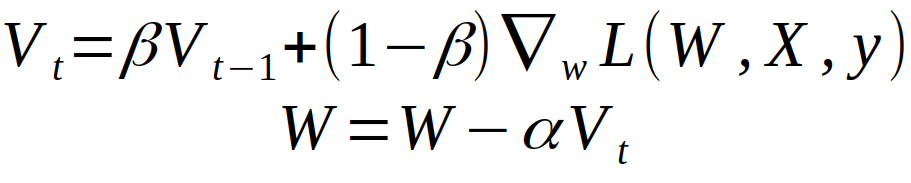

In [150]:
import random
class LinearRegressionMomentum:
    def y_func(self, x):
        y = x.dot(self.w) + self.w0
        return y.reshape(-1, 1)

    def loss(self, y_true, y_pred):
        return np.average((y_true - y_pred) ** 2, axis=0)[0]

    def fit(self, x, y, epochs=1000, alpha=0.0001, beta=0.9):
        assert len(x) == len(y)
        self.w = np.random.random(size=(x.shape[1],1))
        self.w0 = np.random.random()
        Vdw0 = 0
        Vdw = np.zeros((x.shape[1],1))
        for epoch in range(epochs):
            n = random.randint(0, len(x)-1)
            x_ = x[n, :]
            y_ = y[n]
            dw0 = -2 * (y_ - self.y_func(x_)).sum() 
            dw = -2 * x_.T.reshape(-1, 1).dot(y_.reshape(-1, 1) - self.y_func(x_)).sum() 
            Vdw0 = beta * Vdw0 + (1 - beta) * dw0
            Vdw = beta * Vdw + (1 - beta) * dw

            self.w0 = self.w0 -  alpha * Vdw0
            self.w = self.w - alpha * Vdw
            loss_ = self.loss(y, self.y_func(x))
            print(f'Epoch {epoch}: loss = {loss_}')

    def predict(self, x):
        return self.y_func(x)

In [151]:
lr = LinearRegressionMomentum()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

Epoch 0: loss = 7.194389194182722
Epoch 1: loss = 7.18431725138571
Epoch 2: loss = 7.169043759392459
Epoch 3: loss = 7.149978804112258
Epoch 4: loss = 7.125967432141215
Epoch 5: loss = 7.101791531019106
Epoch 6: loss = 7.074548673928446
Epoch 7: loss = 7.038285227438861
Epoch 8: loss = 7.002021893811265
Epoch 9: loss = 6.965543066473089
Epoch 10: loss = 6.921426934502332
Epoch 11: loss = 6.870009259299256
Epoch 12: loss = 6.82139966081912
Epoch 13: loss = 6.769889205319806
Epoch 14: loss = 6.720676157924038
Epoch 15: loss = 6.675097256737295
Epoch 16: loss = 6.624825605166667
Epoch 17: loss = 6.567930977505379
Epoch 18: loss = 6.516445432746863
Epoch 19: loss = 6.465439208644264
Epoch 20: loss = 6.410767680987056
Epoch 21: loss = 6.35522162767783
Epoch 22: loss = 6.299239130562728
Epoch 23: loss = 6.24714050416504
Epoch 24: loss = 6.191974877666013
Epoch 25: loss = 6.137861033589964
Epoch 26: loss = 6.078935629390699
Epoch 27: loss = 6.025786756004831
Epoch 28: loss = 5.967710220043832

0.012508391350475184

## Регуляризация

Итак, вернемся к вопросу L1 и L2 регуляризации. Напомним формулы регуляризации:

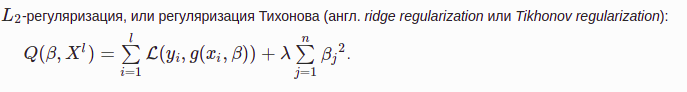

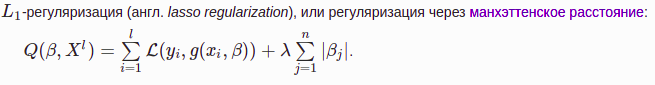

Имплементируем их:

In [ ]:
class LinearRegressionL2:
    def y_func(self, x):
        y = x.dot(self.w) + self.w0
        return y.reshape(-1, 1)

    def loss(self, y_true, y_pred):
        return np.average((y_true - y_pred) ** 2, axis=0)[0]

    def fit(self, x, y, epochs=500, alpha=0.0001, lamb=0.9, verbose=1):
        assert len(x) == len(y)
        self.w = np.random.random(size=(x.shape[1],1))
    
        self.w0 = np.random.random()
        for epoch in range(epochs):

            f = (y - self.y_func(x))
            self.w0 = self.w0 -  alpha / len(y) * (-2 * f.sum() + 2 * lamb * self.w0)
            self.w = self.w - alpha / len(y) * (-2 * x.T.dot(f).sum() + 2 * lamb * self.w)
            loss_ = self.loss(y, self.y_func(x))
            if verbose == 1:
                print(f'Epoch {epoch}: loss = {loss_}')

    def predict(self, x):
        return self.y_func(x)

In [ ]:
lr = LinearRegressionL2()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

Epoch 0: loss = 0.05069051957264562
Epoch 1: loss = 0.05613552828448837
Epoch 2: loss = 0.05553518232025978
Epoch 3: loss = 0.05521254320983945
Epoch 4: loss = 0.0548865225958197
Epoch 5: loss = 0.05456550227082504
Epoch 6: loss = 0.054249159832418
Epoch 7: loss = 0.053937438097265235
Epoch 8: loss = 0.053630272738468494
Epoch 9: loss = 0.05332760054115765
Epoch 10: loss = 0.05302935913988895
Epoch 11: loss = 0.052735487014780834
Epoch 12: loss = 0.05244592347995354
Epoch 13: loss = 0.05216060867235747
Epoch 14: loss = 0.05187948354074362
Epoch 15: loss = 0.051602489834781336
Epoch 16: loss = 0.05132957009432121
Epoch 17: loss = 0.05106066763880038
Epoch 18: loss = 0.05079572655679008
Epoch 19: loss = 0.05053469169568165
Epoch 20: loss = 0.05027750865151086
Epoch 21: loss = 0.05002412375891713
Epoch 22: loss = 0.04977448408123702
Epoch 23: loss = 0.04952853740073002
Epoch 24: loss = 0.04928623220893406
Epoch 25: loss = 0.049047517697150225
Epoch 26: loss = 0.048812343747053816
Epoch 27

0.038112462463952695

In [ ]:
class LinearRegressionL1:
    def y_func(self, x):
        y = x.dot(self.w) + self.w0
        return y.reshape(-1, 1)

    def loss(self, y_true, y_pred):
        return np.average((y_true - y_pred) ** 2, axis=0)[0]

    def fit(self, x, y, epochs=500, alpha=0.0001, lamb=0.9, verbose=1):
        assert len(x) == len(y)
        self.w = np.random.random(size=(x.shape[1],1))
    
        self.w0 = np.random.random()
        for epoch in range(epochs):

            f = (y - self.y_func(x))
            self.w0 = self.w0 -  alpha / len(y) * (-2 * f.sum() + lamb)
            self.w = self.w - alpha / len(y) * (-2 * x.T.dot(f).sum() + lamb)
            loss_ = self.loss(y, self.y_func(x))
            if verbose == 1:
                print(f'Epoch {epoch}: loss = {loss_}')

    def predict(self, x):
        return self.y_func(x)

In [ ]:
lr = LinearRegressionL2()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

Epoch 0: loss = 0.021669710091988377
Epoch 1: loss = 0.028076346113370534
Epoch 2: loss = 0.02762627920399478
Epoch 3: loss = 0.027555834903077465
Epoch 4: loss = 0.027474966750085462
Epoch 5: loss = 0.02739534660448195
Epoch 6: loss = 0.027316608786224977
Epoch 7: loss = 0.027238753311772133
Epoch 8: loss = 0.027161769236174967
Epoch 9: loss = 0.027085646084944112
Epoch 10: loss = 0.027010373505248077
Epoch 11: loss = 0.02693594127474787
Epoch 12: loss = 0.026862339299598553
Epoch 13: loss = 0.026789557612802068
Epoch 14: loss = 0.02671758637257175
Epoch 15: loss = 0.026646415860718652
Epoch 16: loss = 0.026576036481058614
Epoch 17: loss = 0.026506438757840502
Epoch 18: loss = 0.026437613334194855
Epoch 19: loss = 0.02636955097060265
Epoch 20: loss = 0.026302242543384216
Epoch 21: loss = 0.02623567904320796
Epoch 22: loss = 0.026169851573618338
Epoch 23: loss = 0.026104751349583257
Epoch 24: loss = 0.026040369696060273
Epoch 25: loss = 0.025976698046581696
Epoch 26: loss = 0.025913727

0.030276015487947346

**Домашнее задание.** Реализовать ElasticNet регуляризацию.